In [69]:
import pandas as pd

In [70]:
df = pd.read_csv('/content/imdb.csv')
df.head()

,Ranking,Name,Year,Minutes,Genre,Rating,Votes,Gross
0,1.0,Citizen Kane,(1941),119 min,"Drama, Mystery",8.3,"442,770",$1.59M
1,2.0,The Godfather,(1972),175 min,"Crime, Drama",9.2,"1,849,989",$134.97M
2,3.0,The Wizard of Oz,(1939),102 min,"Adventure, Family, Fantasy",8.1,"400,883",$2.08M
3,4.0,The Shawshank Redemption,(1994),142 min,Drama,9.3,"2,669,409",$28.34M
4,5.0,Pulp Fiction,(1994),154 min,"Crime, Drama",8.9,"2,044,257",$107.93M


In [71]:
df.columns

Index(['Ranking', 'Name', 'Year', 'Minutes', 'Genre', 'Rating', 'Votes',
       'Gross'],
      dtype='object')

In [72]:
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("-" * 50)

Unique values in column 'Ranking':
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 1

In [73]:
df.dtypes

,0
Ranking,float64
Name,object
Year,object
Minutes,object
Genre,object
Rating,float64
Votes,object
Gross,object


In [74]:
df['Gross'].isna().value_counts()

,count
Gross,
False,443
True,74


In [75]:
df=df.drop(df[df['Gross'].isna()].index)
df.shape

(443, 8)

In [76]:
# df['Gross'] = df['Gross'].replace('[\$M,]', '', regex=True).astype(float)
df['Min']=df.Minutes.str.extract('(\d+)').astype(int)
df['Gross']=df.Gross.str.extract('(\d+)').astype(int)
df['Year']=df.Year.str.extract('(\d+)').astype(int)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3485645898.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Min']=df.Minutes.str.extract('(\d+)').astype(int)
/tmp/ipython-input-3485645898.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['Gross']=df.Gross.str.extract('(\d+)').astype(int)
/tmp/ipython-input-3485645898.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['Year']=df.Year.str.extract('(\d+)').astype(int)


,Ranking,Name,Year,Minutes,Genre,Rating,Votes,Gross,Min
0,1.0,Citizen Kane,1941,119 min,"Drama, Mystery",8.3,"442,770",1,119
1,2.0,The Godfather,1972,175 min,"Crime, Drama",9.2,"1,849,989",134,175
2,3.0,The Wizard of Oz,1939,102 min,"Adventure, Family, Fantasy",8.1,"400,883",2,102
3,4.0,The Shawshank Redemption,1994,142 min,Drama,9.3,"2,669,409",28,142
4,5.0,Pulp Fiction,1994,154 min,"Crime, Drama",8.9,"2,044,257",107,154


In [77]:
df = df.rename(columns={'Gross': 'Gross(in milions)'})

In [78]:
df['Gross(in milions)'].dtype

dtype('int64')

In [81]:
df.describe()

,Ranking,Year,Rating,Gross(in milions),Min
count,443.000000,443.000000,443.000000,443.000000,443.000000
mean,259.880361,1985.837472,8.053273,74.392777,123.803612
std,150.379570,24.553492,0.328312,108.018786,28.907635
min,1.000000,1916.000000,7.100000,0.000000,45.000000
25%,133.500000,1969.000000,7.900000,5.000000,103.000000
50%,265.000000,1993.000000,8.000000,32.000000,120.000000
75%,390.500000,2006.000000,8.200000,100.500000,138.000000
max,517.000000,2018.000000,9.300000,936.000000,238.000000


In [85]:
df.Year.value_counts()


,count
Year,
2014,14
1995,11
1998,11
2004,11
1982,10
...,...
1928,1
1947,1
1956,1


In [91]:
df

,Ranking,Name,Year,Genre,Rating,Votes,Gross(in milions),Min
0,1.0,Citizen Kane,1941,"Drama, Mystery",8.3,"442,770",1,119
1,2.0,The Godfather,1972,"Crime, Drama",9.2,"1,849,989",134,175
2,3.0,The Wizard of Oz,1939,"Adventure, Family, Fantasy",8.1,"400,883",2,102
3,4.0,The Shawshank Redemption,1994,Drama,9.3,"2,669,409",28,142
4,5.0,Pulp Fiction,1994,"Crime, Drama",8.9,"2,044,257",107,154
...,...,...,...,...,...,...,...,...
511,512.0,Cinderella Man,2005,"Biography, Drama, Romance",8.0,"189,036",61,144
512,513.0,From Here to Eternity,1953,"Drama, Romance, War",7.6,"47,598",30,118
513,514.0,Walk the Line,2005,"Biography, Drama, Music",7.8,"252,498",119,136
514,515.0,The Last Emperor,1987,"Biography, Drama, History",7.7,"104,338",43,163


from matplotlib import pyplot as plt
df['Ranking'].plot(kind='hist', bins=20, title='Ranking')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Gross(in milions)'].plot(kind='hist', bins=20, title='Gross(in milions)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Ranking', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Year', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Rating', y='Gross(in milions)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Gross(in milions)', y='Min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ranking']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Ranking', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ranking')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ranking']
  ys = series['Gross(in milions)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Ranking', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ranking')
_ = plt.ylabel('Gross(in milions)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ranking']
  ys = series['Min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Ranking', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ranking')
_ = plt.ylabel('Min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Ranking']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Ranking'}, axis=1)
              .sort_values('Ranking', ascending=True))
  xs = counted['Ranking']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Ranking', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ranking')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Ranking'].plot(kind='line', figsize=(8, 4), title='Ranking')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Gross(in milions)'].plot(kind='line', figsize=(8, 4), title='Gross(in milions)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Genre', ylabel='Rating'>

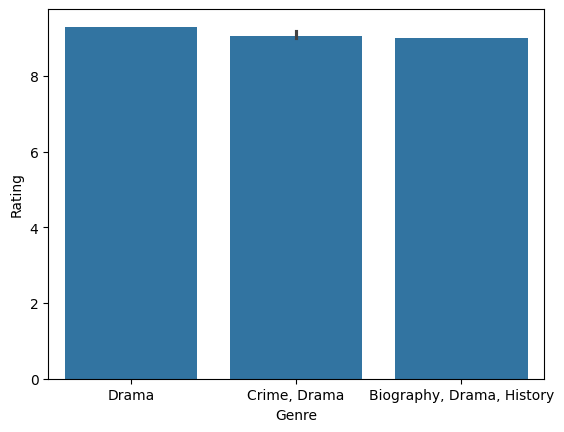

In [107]:
top5 = df.nlargest(5, 'Rating')

sns.barplot(x='Genre', y='Rating', data=top5)

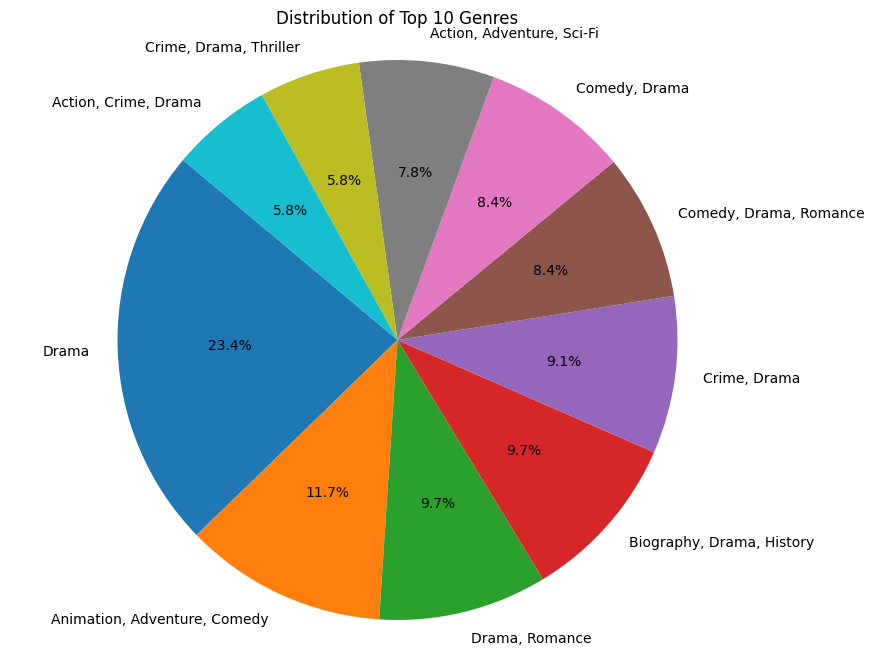

In [112]:
top_genres = df['Genre'].value_counts().nlargest(10)
plt.figure(figsize=(10, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Genres')
plt.axis('equal')
plt.show()